In [127]:
import pandas as pd
import numpy as np
import io
import scipy as sp
import scipy.fftpack
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt

In [128]:
%%html
<style>
table {display: block; align: left;}
</style>

## Load DNS Data

In [129]:
chanDNSReT = {
    "ReT_180" : 178.12,
    "ReT_395" : 392.24,
    "ReT_590" : 587.19,
    "ReT_1000" : 1000.512,
    "ReT_2000" : 1994.756,
    "ReT_5200" : 5185.897   
}

chanDNSMeans = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_means.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_means.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_means.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_means.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_means.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_means.txt"    
}

chanDNSReys = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_rey.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_rey.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_rey.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_rey.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_rey.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_rey.txt"    
}

chanDNSk = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_k.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_k.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_k.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_k.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_k.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_k.txt"    
}


chanMeans = {}
chanReys = {}
chanK = {}

for key in chanDNSMeans:
    chanMeans[key] = pd.read_csv(chanDNSMeans[key], delim_whitespace=True)
    chanReys[key] = pd.read_csv(chanDNSReys[key], delim_whitespace=True)
    chanK[key] = pd.read_csv(chanDNSk[key], delim_whitespace=True)
    

## Load RANS Data

In [142]:
chanRESsst = {
    "ReT_395" : "./paraview_output_time74_395_nate_sst.csv",   
}

chanSimSST = {}

for key in chanRESsst:
    chanSimSST[key] = pd.read_csv(chanRESsst[key])

#for key in chanSimSST['ReT_395']:
    #print(key)

## Load IDDES Data

In [170]:
chanRESiddes = {}
chanRIJiddes = {}
simLabel = {}

chanRESiddes["ReT_395"] = {
 "aU_0_fixes" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_0_withfixes/results/xavg.dat", 
 "aU_1_fixes" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_1_withfixes/results/xavg.dat",
 "aU_0_fixes_nm" : "/nscratch/ndeveld/iddes-nalu/run/chan395_ar2_iso70/results/xavg.dat",
 "aU_0_fixes_lup" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_lessupw/results/xavg.dat"
}

chanRIJiddes["ReT_395"] = {
 "aU_0_fixes" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_0_withfixes/results/rij_xavg.dat", 
 "aU_1_fixes" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_1_withfixes/results/rij_xavg.dat",
 "aU_0_fixes_nm" : "/nscratch/ndeveld/iddes-nalu/run/chan395_ar2_iso70/results/rij_xavg.dat",
 "aU_0_fixes_lup" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_lessupw/results/rij_xavg.dat"
}

simLabel["ReT_395"] = {
 "aU_0_fixes" : "IDDES sigmaMax=0 w/fixes", 
 "aU_1_fixes" : "IDDES sigmaMax=1 w/fixes",
 "aU_0_fixes_nm" : "IDDES sigmaMax=0 w/fixes new mesh",
 "aU_0_fixes_lup" : "IDDES sigmaMax=0 w/fixes less upw_factor"
}

chanSimIDDES = {}
chanSimIDDES["ReT_395"] = {}

chanRijIDDES = {}
chanRijIDDES["ReT_395"] = {}

for key in chanRESiddes["ReT_395"]:
    chanSimIDDES["ReT_395"][key] = pd.read_csv(chanRESiddes["ReT_395"][key])

for key in chanRIJiddes["ReT_395"]:
    chanRijIDDES["ReT_395"][key] = pd.read_csv(chanRIJiddes["ReT_395"][key])

## Plot DNS Data For All $Re_{\tau}$

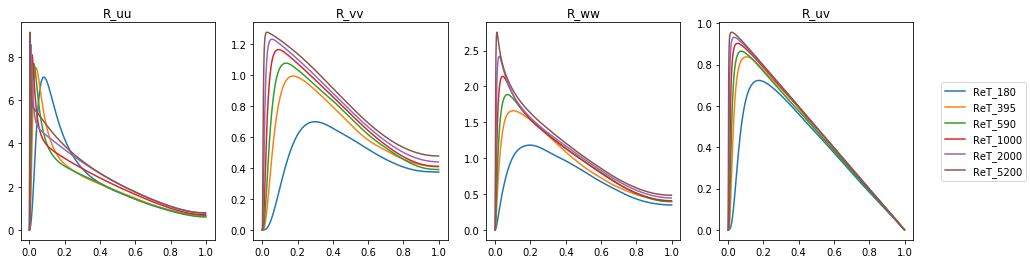

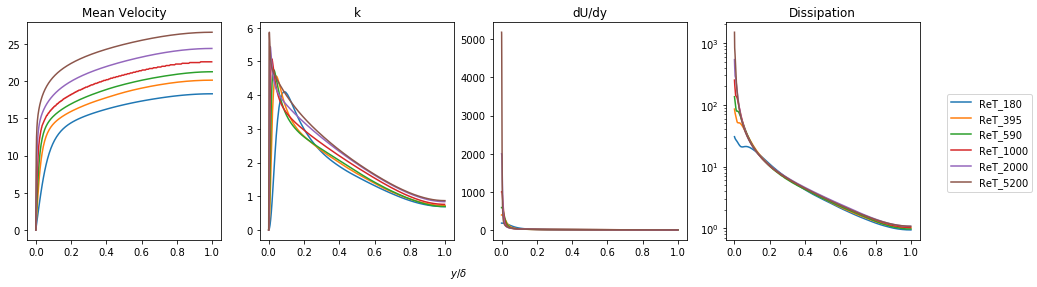

In [144]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4),sharex=True)


for key in chanReys:
    ax1.plot(chanReys[key]['y'],chanReys[key]['R_uu'])
    ax1.set_title("R_uu")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['R_vv'])
    ax2.set_title("R_vv")
    #ax2.set_xscale('log')
    
    ax3.plot(chanReys[key]['y'],chanReys[key]['R_ww'])
    ax3.set_title("R_ww")
    #ax3.set_xscale('log')
    
    ax4.plot(chanReys[key]['y'],-1*chanReys[key]['R_uv'])
    ax4.set_title("R_uv")
    #ax4.set_xscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4),sharex=True)

for key in chanMeans:
    ax1.plot(chanMeans[key]['y'],chanMeans[key]['Umean'])
    ax1.set_title("Mean Velocity")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k'])
    ax2.set_title("k")
    #ax2.set_xscale('log')
    
    ax3.plot(chanMeans[key]['y'],chanMeans[key]['dUmean/dy'])
    ax3.set_title("dU/dy")
    #ax3.set_yscale('log')
    
    ax4.plot(chanK[key]['y'],chanK[key]['dissip']*chanDNSReT[key])
    ax4.set_title("Dissipation")
    ax4.set_yscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanMeans.keys()
fig.legend(handles, labels, loc='center right')
fig.text(0.5, 0.0, r'$y/\delta$', ha='center')
plt.show()

## Length Scale and Time Scale

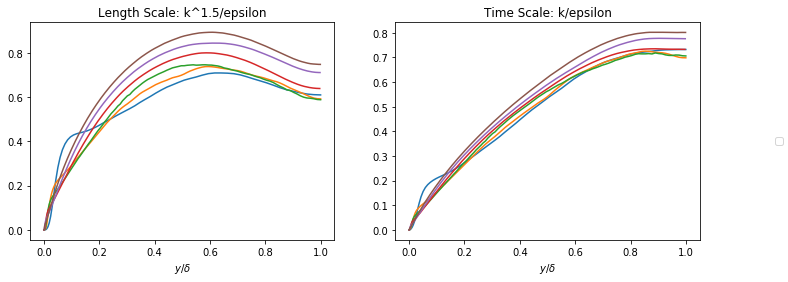

In [136]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

for key in chanMeans:
    ax1.plot(chanReys[key]['y'],(chanReys[key]['k']**1.5)/(chanK[key]['dissip']*chanDNSReT[key]))
    ax1.set_title("Length Scale: k^1.5/epsilon")
    ax1.set_xlabel(r'$y/ \delta$')
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k']/(chanK[key]['dissip']*chanDNSReT[key]))
    ax2.set_title("Time Scale: k/epsilon")
    ax2.set_xlabel(r'$y/ \delta$')
    #ax2.set_xscale('log')

handles, labels = ax2.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()

## Results

### ReT=395 Channel Flow RANS SST

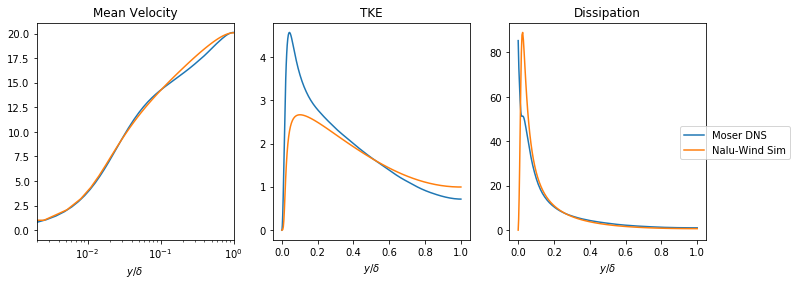

In [141]:
ret = 'ReT_395'
reNu = 1.0/chanDNSReT["ReT_395"]

dns395U = chanMeans[ret]['Umean']
dns395k = chanReys[ret]['k']
dns395yr = chanReys[ret]['y']
dns395y = chanMeans[ret]['y']
dns395dis = chanK[ret]['dissip']*chanDNSReT[ret]

sim395y = chanSimSST[ret]['Points:1']
sim395yp = sim395y/reNu
sim395U = chanSimSST[ret]['velocity_:0']
sim395k = chanSimSST[ret]['turbulent_ke']
sim395dis = 0.09*chanSimSST[ret]['turbulent_ke']*chanSimSST[ret]['specific_dissipation_rate']

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

ax1.plot(dns395y,dns395U, label="Moser DNS")
ax1.plot(sim395y,sim395U, label="Nalu-Wind Sim")
ax1.set_title("Mean Velocity")
ax1.set_xlabel(r'$y/ \delta$')
ax1.set_xscale('log')
ax1.set_xlim([0.002,1])

ax2.plot(dns395yr,dns395k, label="Moser DNS")
ax2.plot(sim395y,sim395k, label="Nalu-Wind Sim")
ax2.set_title("TKE")
ax2.set_xlabel(r'$y/ \delta$')

ax3.plot(dns395y,dns395dis, label="Moser DNS")
ax3.plot(sim395y,sim395dis, label="Nalu-Wind Sim")
ax3.set_title("Dissipation")
ax3.set_xlabel(r'$y/ \delta$')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()


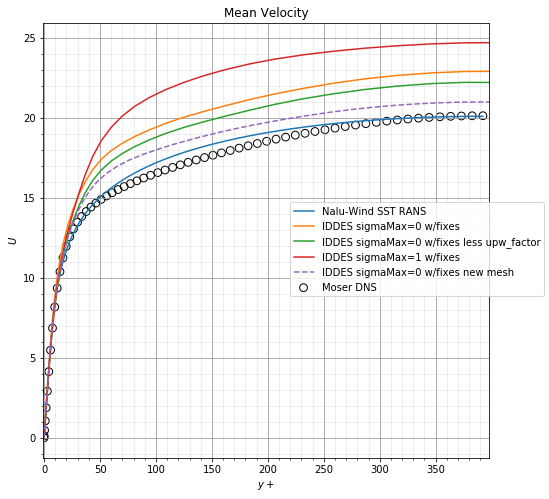

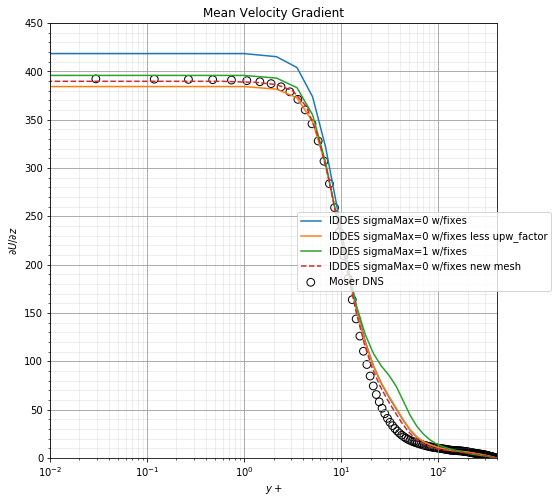

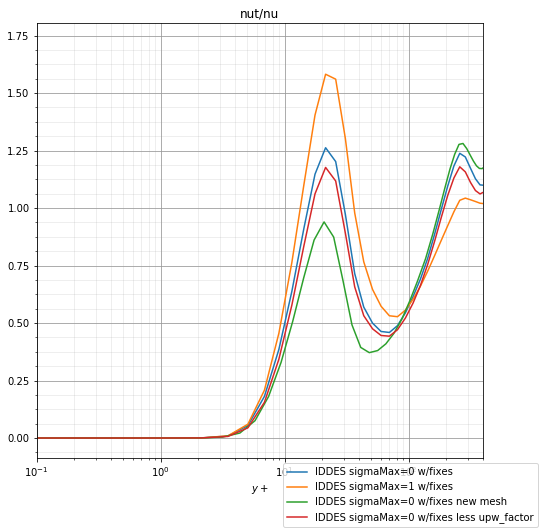

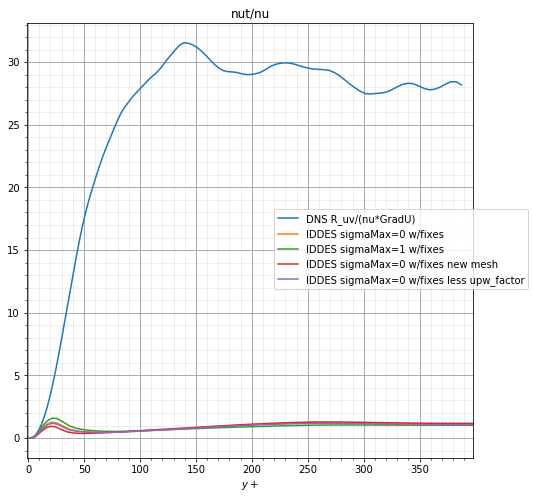

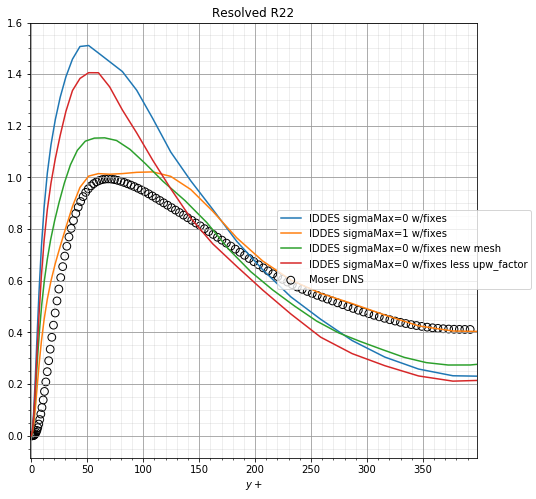

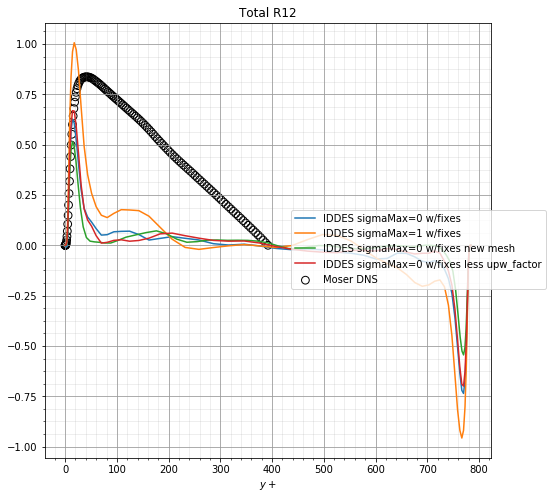

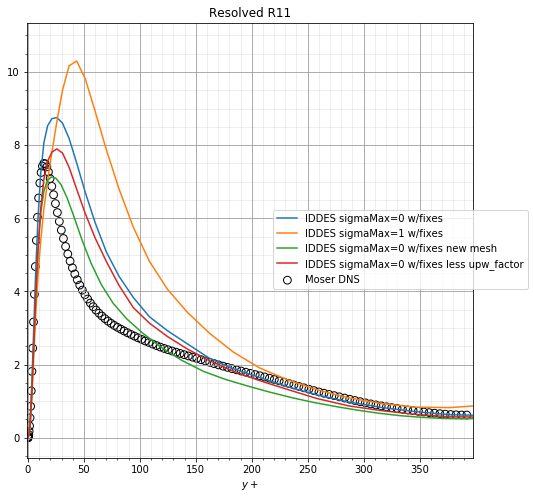

In [191]:
ret = 'ReT_395'

reNu = 1.0/chanDNSReT["ReT_395"]

#### Load DNS Data ####
dns395U = chanMeans[ret]['Umean']
dns395k = chanReys[ret]['k']
dns395yr = chanReys[ret]['y']
dns395uv = -chanReys[ret]['R_uv']
dns395vv = chanReys[ret]['R_vv']
dns395uu = chanReys[ret]['R_uu']
dns395dudy = chanMeans[ret]['dUmean/dy']
dns395y = chanMeans[ret]['y']
dns395yp = chanMeans[ret]['y+']
dns395dis = chanK[ret]['dissip']*chanDNSReT[ret]
dns395nut = dns395uv/dns395dudy


iddes395y = {}
iddes395yp = {}
iddes395y2 = {}
iddes395yp2 = {}
iddes395U = {}
iddes395k = {}
iddes395nut = {}
iddes395vv = {}
iddes395uv = {}
iddes395uu = {}
iddes395dudy = {}


for key in chanSimIDDES["ReT_395"]:
        iddes395y[key] = chanSimIDDES["ReT_395"][key]['z']
        iddes395yp[key] = iddes395y[key]/reNu
        iddes395y2[key] = chanSimIDDES["ReT_395"][key]['z']
        iddes395yp2[key] = iddes395y2[key]/reNu
        iddes395U[key] = chanSimIDDES["ReT_395"][key]['u']
        iddes395k[key] = chanSimIDDES["ReT_395"][key]['u']
        iddes395dudy[key] = np.gradient(iddes395U[key],iddes395y[key])
        if 'nut' in chanSimIDDES["ReT_395"][key].keys():
            iddes395nut[key] = chanSimIDDES["ReT_395"][key]['nut']
        if 'vv' in chanRijIDDES["ReT_395"][key].keys():
            iddes395vv[key] = chanRijIDDES["ReT_395"][key]['vv']
            iddes395uv[key] = chanRijIDDES["ReT_395"][key]['uv']
            iddes395uu[key] = chanRijIDDES["ReT_395"][key]['uu']



#### Construct plot to compare mean velocity ####
fig, (ax1) = plt.subplots(1,1,figsize=(8,8))
n=2
ax1.scatter(dns395yp[::n], dns395U[::n], s=60, facecolors='none', edgecolors='k', label="Moser DNS")
ax1.plot(sim395yp,sim395U, label="Nalu-Wind SST RANS")
ax1.plot(iddes395yp["aU_0_fixes"],iddes395U["aU_0_fixes"], label=simLabel["ReT_395"]["aU_0_fixes"])
ax1.plot(iddes395yp["aU_0_fixes_lup"],iddes395U["aU_0_fixes_lup"], label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax1.plot(iddes395yp["aU_1_fixes"],iddes395U["aU_1_fixes"], label=simLabel["ReT_395"]["aU_1_fixes"])
ax1.plot(iddes395yp["aU_0_fixes_nm"],iddes395U["aU_0_fixes_nm"], label=simLabel["ReT_395"]["aU_0_fixes_nm"],linestyle="--")
ax1.set_title("Mean Velocity")
ax1.set_xlabel(r'$y+$')
ax1.set_xlim([-1,398])
ax1.set_ylabel(r'$U$')
#ax1.set_yscale('log')
#ax1.set_xscale('log')

#### Get handles and print plot ####
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


#### Construct plot to compare mean velocity gradient ####
fig, (ax1) = plt.subplots(1,1,figsize=(8,8))
n=1
ax1.scatter(dns395yp[::n], dns395dudy[::n], s=60, facecolors='none', edgecolors='k', label="Moser DNS")
ax1.plot(iddes395yp["aU_0_fixes"],iddes395dudy["aU_0_fixes"], label=simLabel["ReT_395"]["aU_0_fixes"])
ax1.plot(iddes395yp["aU_0_fixes_lup"],iddes395dudy["aU_0_fixes_lup"], label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax1.plot(iddes395yp["aU_1_fixes"],iddes395dudy["aU_1_fixes"], label=simLabel["ReT_395"]["aU_1_fixes"])
ax1.plot(iddes395yp["aU_0_fixes_nm"],iddes395dudy["aU_0_fixes_nm"], label=simLabel["ReT_395"]["aU_0_fixes_nm"],linestyle="--")
ax1.set_title("Mean Velocity Gradient")
ax1.set_xlabel(r'$y+$')
ax1.set_xlim([0.01,398])
ax1.set_ylim([0,450])
ax1.set_ylabel(r'$\partial U / \partial z$')
#ax1.set_yscale('log')
ax1.set_xscale('log')

#### Get handles and print plot ####
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#### Construct plot to compare SGS nut/nu ####
fig, (ax1) = plt.subplots(1,1,figsize=(8,8))
ax1.plot(iddes395yp["aU_0_fixes"],iddes395nut["aU_0_fixes"]/reNu, label=simLabel["ReT_395"]["aU_0_fixes"])
ax1.plot(iddes395yp["aU_1_fixes"],iddes395nut["aU_1_fixes"]/reNu, label=simLabel["ReT_395"]["aU_1_fixes"])
ax1.plot(iddes395yp["aU_0_fixes_nm"],iddes395nut["aU_0_fixes_nm"]/reNu, label=simLabel["ReT_395"]["aU_0_fixes_nm"])
ax1.plot(iddes395yp["aU_0_fixes_lup"],iddes395nut["aU_0_fixes_lup"]/reNu, label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax1.set_xlabel(r'$y+$')
ax1.set_xlim([0.1,398])
ax1.set_title("nut/nu")
ax1.set_xscale('log')

#### Get handles and print plot ####
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#### Construct plot to compare nut/nu to necessary nut/nu ####
fig, (ax2) = plt.subplots(1,1,figsize=(8,8))
ax2.plot(dns395yp,dns395nut/reNu, label="DNS R_uv/(nu*GradU)")
ax2.plot(iddes395yp["aU_0_fixes"],iddes395nut["aU_0_fixes"]/reNu, label=simLabel["ReT_395"]["aU_0_fixes"])
ax2.plot(iddes395yp["aU_1_fixes"],iddes395nut["aU_1_fixes"]/reNu, label=simLabel["ReT_395"]["aU_1_fixes"])
ax2.plot(iddes395yp["aU_0_fixes_nm"],iddes395nut["aU_0_fixes_nm"]/reNu, label=simLabel["ReT_395"]["aU_0_fixes_nm"])
ax2.plot(iddes395yp["aU_0_fixes_lup"],iddes395nut["aU_0_fixes_lup"]/reNu, label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax2.set_xlabel(r'$y+$')
ax2.set_title("nut/nu")
ax2.set_xlim([-1,398])

#### Get handles and print plot ####
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


#### Construct plot to compare R22  ####
fig, (ax2) = plt.subplots(1,1,figsize=(8,8))
ax2.scatter(dns395yp[::n], dns395vv[::n], s=60, facecolors='none', edgecolors='k', label="Moser DNS")
ax2.plot(iddes395yp["aU_0_fixes"],iddes395vv["aU_0_fixes"], label=simLabel["ReT_395"]["aU_0_fixes"])
ax2.plot(iddes395yp["aU_1_fixes"],iddes395vv["aU_1_fixes"], label=simLabel["ReT_395"]["aU_1_fixes"])
ax2.plot(iddes395yp["aU_0_fixes_nm"],iddes395vv["aU_0_fixes_nm"], label=simLabel["ReT_395"]["aU_0_fixes_nm"])
ax2.plot(iddes395yp["aU_0_fixes_lup"],iddes395vv["aU_0_fixes_lup"], label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax2.set_xlabel(r'$y+$')
ax2.set_title("Resolved R22")
ax2.set_xlim([-1,398])


#### Get handles and print plot ####
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


#### Construct plot to compare R12  ####
fig, (ax2) = plt.subplots(1,1,figsize=(8,8))
ax2.scatter(dns395yp[::n], dns395uv[::n], s=60, facecolors='none', edgecolors='k', label="Moser DNS")
ax2.plot(iddes395yp["aU_0_fixes"],iddes395uv["aU_0_fixes"] + 2*iddes395nut["aU_0_fixes"]*iddes395dudy["aU_0_fixes"], label=simLabel["ReT_395"]["aU_0_fixes"])
ax2.plot(iddes395yp["aU_1_fixes"],iddes395uv["aU_1_fixes"] + 2*iddes395nut["aU_1_fixes"]*iddes395dudy["aU_1_fixes"], label=simLabel["ReT_395"]["aU_1_fixes"])
ax2.plot(iddes395yp["aU_0_fixes_nm"],iddes395uv["aU_0_fixes_nm"] + 2*iddes395nut["aU_0_fixes_nm"]*iddes395dudy["aU_0_fixes_nm"], label=simLabel["ReT_395"]["aU_0_fixes_nm"])
ax2.plot(iddes395yp["aU_0_fixes_lup"],iddes395uv["aU_0_fixes_lup"] + 2*iddes395nut["aU_0_fixes_lup"]*iddes395dudy["aU_0_fixes_lup"], label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax2.set_xlabel(r'$y+$')
ax2.set_title("Total R12")
#ax2.set_xlim([-1,398])


#### Get handles and print plot ####
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#### Construct plot to compare R11  ####
fig, (ax2) = plt.subplots(1,1,figsize=(8,8))
ax2.scatter(dns395yp[::n], dns395uu[::n], s=60, facecolors='none', edgecolors='k', label="Moser DNS")
ax2.plot(iddes395yp["aU_0_fixes"],iddes395uu["aU_0_fixes"], label=simLabel["ReT_395"]["aU_0_fixes"])
ax2.plot(iddes395yp["aU_1_fixes"],iddes395uu["aU_1_fixes"], label=simLabel["ReT_395"]["aU_1_fixes"])
ax2.plot(iddes395yp["aU_0_fixes_nm"],iddes395uu["aU_0_fixes_nm"], label=simLabel["ReT_395"]["aU_0_fixes_nm"])
ax2.plot(iddes395yp["aU_0_fixes_lup"],iddes395uu["aU_0_fixes_lup"], label=simLabel["ReT_395"]["aU_0_fixes_lup"])
ax2.set_xlabel(r'$y+$')
ax2.set_title("Resolved R11")
ax2.set_xlim([-1,398])


#### Get handles and print plot ####
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#### 